## 2. MODELLING
 ### Multivariate statistics and mediation relationship

In [35]:
# Load library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
from datetime import datetime
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as stm
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.mediation import Mediation

# Manage warnings
pd.set_option('mode.chained_assignment', None)

# Read the file into the workspace
Apps_clean = pd.read_csv(r'./Datasets/Apps_clean.csv')
Personality = pd.read_excel(r'./Datasets/Part_Personality.xlsx')

# concatenate 'Probanden_ID' and 'lfdn' to create a new unique variable
# which identify the combination participant-app
Personality['Probanden_ID__lfdn'] = Personality.Probanden_ID.astype(str) + \
                                        '__' + Personality.lfdn.astype(str)


### Check assumptions that observations are time independent

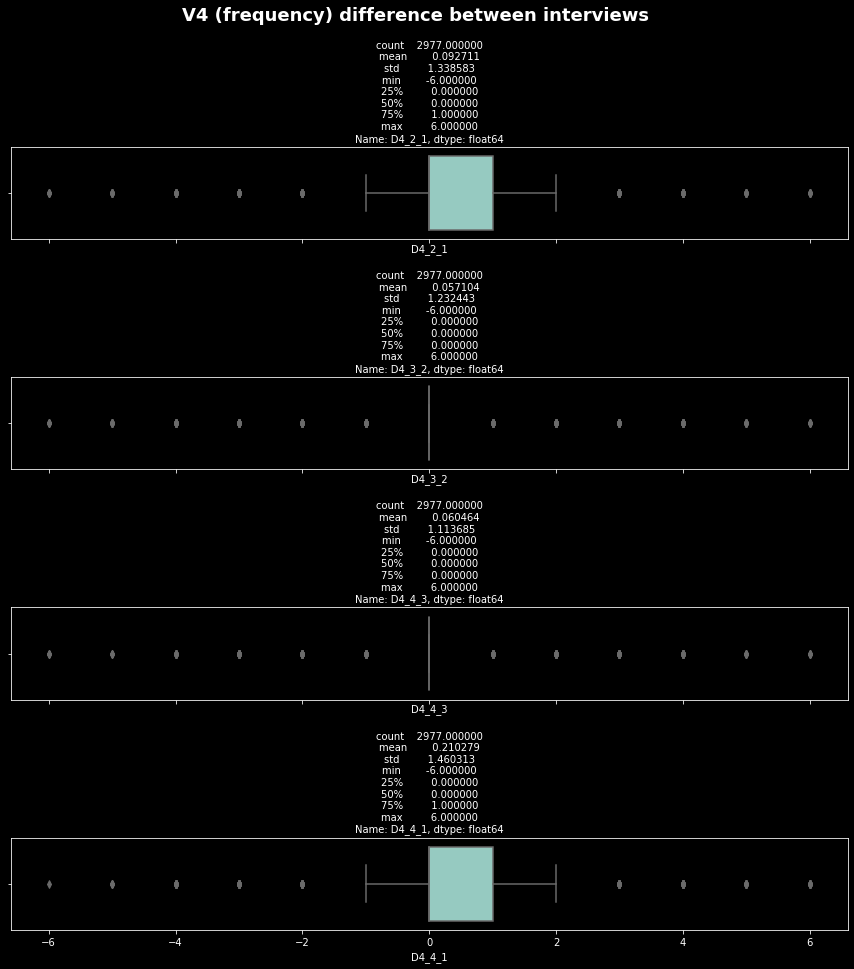

In [3]:
# V4
Apps_clean.loc[:, 'D4_2_1'] = Apps_clean.loc[:, 'V4_2_Interview'] - \
                              Apps_clean.loc[:, 'V4_1_Interview']
Apps_clean.loc[:, 'D4_3_2'] = Apps_clean.loc[:, 'V4_3_Interview'] - \
                              Apps_clean.loc[:, 'V4_2_Interview']
Apps_clean.loc[:, 'D4_4_3'] = Apps_clean.loc[:, 'V4_4_Interview'] - \
                              Apps_clean.loc[:, 'V4_3_Interview']
Apps_clean.loc[:, 'D4_4_1'] = Apps_clean.loc[:, 'V4_4_Interview'] - \
                              Apps_clean.loc[:, 'V4_1_Interview']

fig, axs = plt.subplots(4, sharex=True, sharey=True, figsize=(15, 15))
fig.suptitle('V4 (frequency) difference between interviews',
             fontsize=18, fontweight='bold')
sns.boxplot(Apps_clean['D4_2_1'], ax=axs[0])
axs[0].set_title('{}'.format(pd.DataFrame.describe(Apps_clean['D4_2_1'])),
                 fontsize=10)
sns.boxplot(Apps_clean['D4_3_2'], ax=axs[1])
axs[1].set_title('{}'.format(pd.DataFrame.describe(Apps_clean['D4_3_2'])),
                 fontsize=10)
sns.boxplot(Apps_clean['D4_4_3'], ax=axs[2])
axs[2].set_title('{}'.format(pd.DataFrame.describe(Apps_clean['D4_4_3'])),
                 fontsize=10)
sns.boxplot(Apps_clean['D4_4_1'], ax=axs[3])
axs[3].set_title('{}'.format(pd.DataFrame.describe(Apps_clean['D4_4_1'])),
                 fontsize=10)
fig.subplots_adjust(top=0.85, hspace=1.5)
plt.show()


**COMMENT**: <br />
 - Most of the observations 50%/75% didn't change with time.
 - Biggest difference bewteen the second and the first interview where the frequency of ~20% obs increased by 1.

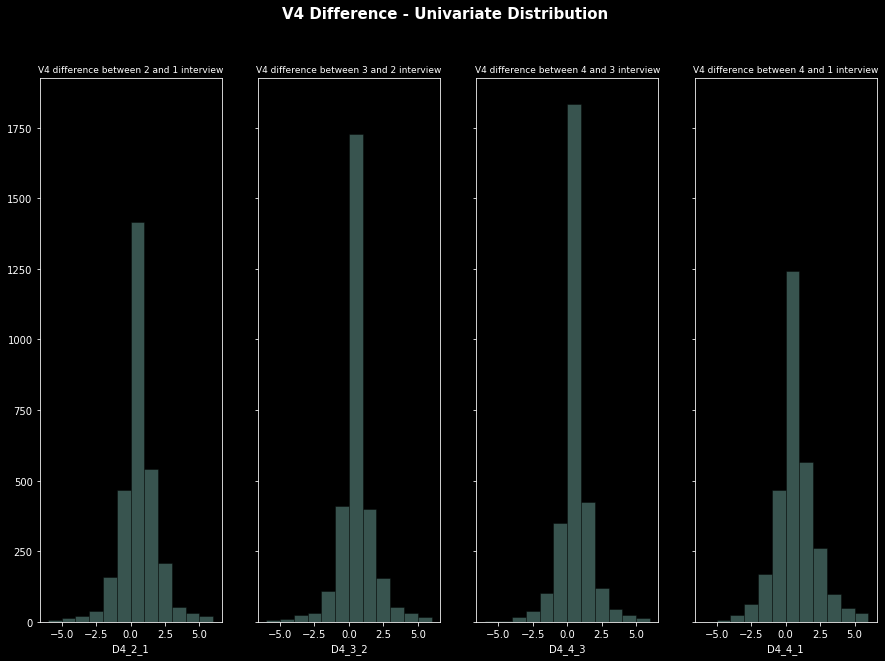

In [4]:
fig, axs = plt.subplots(nrows=1, ncols=4, sharex=True,
                        sharey=True, figsize=(15, 10))
fig.suptitle('V4 Difference - Univariate Distribution',
             fontsize=15, fontweight='bold')
sns.distplot(Apps_clean['D4_2_1'], bins=np.arange(-6, 7),
             hist_kws=dict(ec="k"), kde=False, ax=axs[0])
axs[0].set_title('V4 difference between 2 and 1 interview', fontsize=9)
sns.distplot(Apps_clean['D4_3_2'], bins=np.arange(-6, 7),
             hist_kws=dict(ec="k"), kde=False, ax=axs[1])
axs[1].set_title('V4 difference between 3 and 2 interview', fontsize=9)
sns.distplot(Apps_clean['D4_4_3'], bins=np.arange(-6, 7),
             hist_kws=dict(ec="k"), kde=False, ax=axs[2])
axs[2].set_title('V4 difference between 4 and 3 interview', fontsize=9)
sns.distplot(Apps_clean['D4_4_1'], bins=np.arange(-6, 7),
             hist_kws=dict(ec="k"), kde=False, ax=axs[3])
axs[3].set_title('V4 difference between 4 and 1 interview', fontsize=9)
fig.subplots_adjust(hspace=0.8)
plt.show()


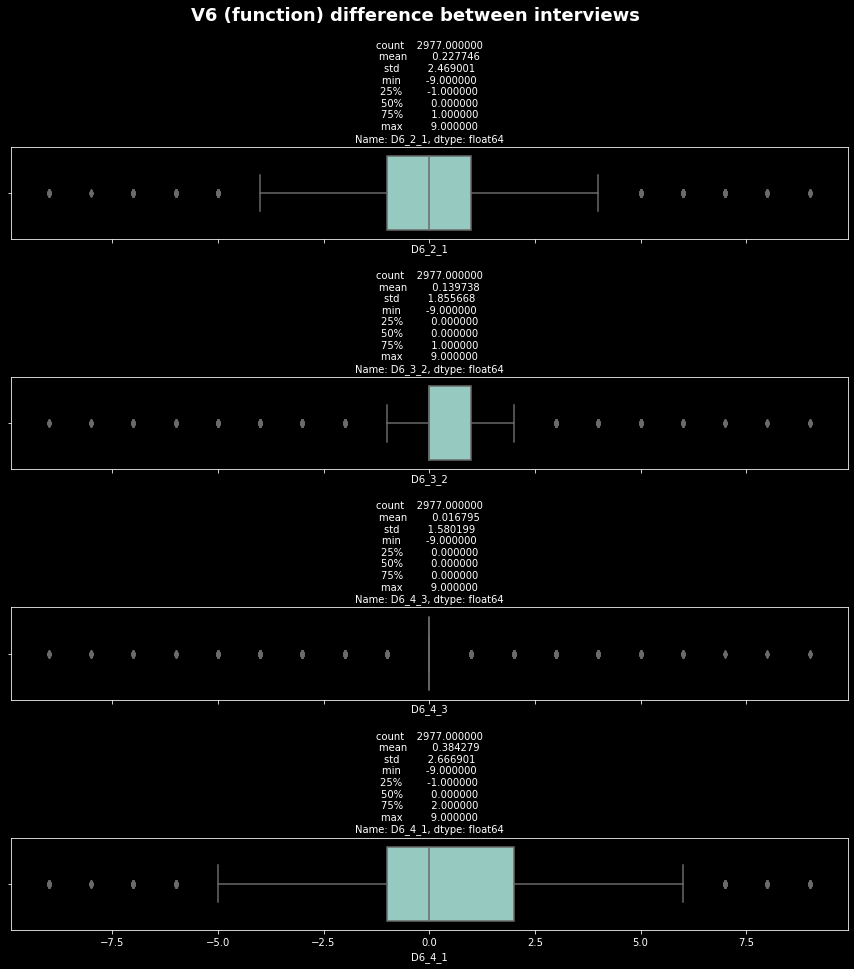

In [5]:
# V6
Apps_clean['D6_2_1'] = Apps_clean['V6_2_Interview'] - \
                       Apps_clean['V6_1_Interview']
Apps_clean['D6_3_2'] = Apps_clean['V6_3_Interview'] - \
                       Apps_clean['V6_2_Interview']
Apps_clean['D6_4_3'] = Apps_clean['V6_4_Interview'] - \
                       Apps_clean['V6_3_Interview']
Apps_clean['D6_4_1'] = Apps_clean['V6_4_Interview'] - \
                       Apps_clean['V6_1_Interview']

fig, axs = plt.subplots(4, sharex=True, sharey=True, figsize=(15, 15))
fig.suptitle('V6 (function) difference between interviews',
             fontsize=18, fontweight='bold')
sns.boxplot(Apps_clean['D6_2_1'], ax=axs[0])
axs[0].set_title('{}'.format(pd.DataFrame.describe(Apps_clean['D6_2_1'])),
                 fontsize=10)
sns.boxplot(Apps_clean['D6_3_2'], ax=axs[1])
axs[1].set_title('{}'.format(pd.DataFrame.describe(Apps_clean['D6_3_2'])),
                 fontsize=10)
sns.boxplot(Apps_clean['D6_4_3'], ax=axs[2])
axs[2].set_title('{}'.format(pd.DataFrame.describe(Apps_clean['D6_4_3'])),
                 fontsize=10)
sns.boxplot(Apps_clean['D6_4_1'], ax=axs[3])
axs[3].set_title('{}'.format(pd.DataFrame.describe(Apps_clean['D6_4_1'])),
                 fontsize=10)
fig.subplots_adjust(top=0.85, hspace=1.5)
plt.show()


**COMMENTS**: <br />
 - Most of the observations didn't change with the time.
 - Biggest difference are within the 2nd and 3rd interview.
 - In the second interview ~20% observations increase frequency by 1 and another ~20% decrease by 1.
 - In the third inteview ~20% observation increase by 1.
 - The cumulative effect is incorporate in D6_4_1.

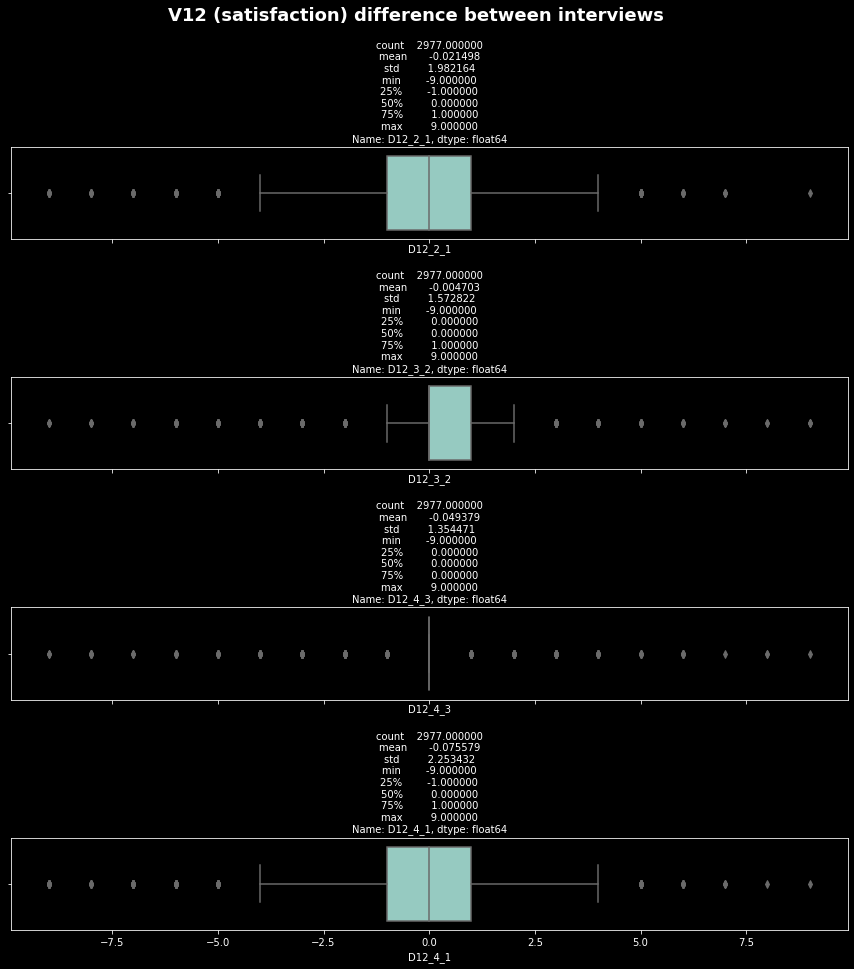

In [6]:
# V12
Apps_clean['D12_2_1'] = Apps_clean['V12_2_Interview'] - \
                       Apps_clean['V12_1_Interview']
Apps_clean['D12_3_2'] = Apps_clean['V12_3_Interview'] - \
                       Apps_clean['V12_2_Interview']
Apps_clean['D12_4_3'] = Apps_clean['V12_4_Interview'] - \
                       Apps_clean['V12_3_Interview']
Apps_clean['D12_4_1'] = Apps_clean['V12_4_Interview'] - \
                       Apps_clean['V12_1_Interview']

fig, axs = plt.subplots(4, sharex=True, sharey=True, figsize=(15, 15))
fig.suptitle('V12 (satisfaction) difference between interviews',
             fontsize=18, fontweight='bold')
sns.boxplot(Apps_clean['D12_2_1'], ax=axs[0])
axs[0].set_title('{}'.format(pd.DataFrame.describe(Apps_clean['D12_2_1'])),
                 fontsize=10)
sns.boxplot(Apps_clean['D12_3_2'], ax=axs[1])
axs[1].set_title('{}'.format(pd.DataFrame.describe(Apps_clean['D12_3_2'])),
                 fontsize=10)
sns.boxplot(Apps_clean['D12_4_3'], ax=axs[2])
axs[2].set_title('{}'.format(pd.DataFrame.describe(Apps_clean['D12_4_3'])),
                 fontsize=10)
sns.boxplot(Apps_clean['D12_4_1'], ax=axs[3])
axs[3].set_title('{}'.format(pd.DataFrame.describe(Apps_clean['D12_4_1'])),
                 fontsize=10)
fig.subplots_adjust(top=0.85, hspace=1.5)
plt.show()

**COMMENT**: <br />
 - There are some "level off" effects.
 - Investigate further the relationship (TODO)

### MODEL 1a: V6_1, V2 ---> V4_1
Model V6 on V4 at the starting point (during the interview 1). <br />
The first interview is a good baseline, since 50% of observations
did not change in the following interviews.  <br />
Mediating for V2 using simple mediation model by Baron and Kenny's (1986).


 **STEP** **1**: V6_1 on V4_1

In [7]:
model1 = stm.OLS(Apps_clean.loc[:, 'V4_1_Interview'],
                 stm.add_constant(Apps_clean.loc[:, 'V6_1_Interview'].values.reshape(-1, 1))).fit()
print(model1.summary())

OLS Regression Results                            
Dep. Variable:         V4_1_Interview   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     436.7
Date:                Mon, 21 Oct 2019   Prob (F-statistic):           1.32e-90
Time:                        12:35:03   Log-Likelihood:                -5636.0
No. Observations:                2977   AIC:                         1.128e+04
Df Residuals:                    2975   BIC:                         1.129e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5415      0.077     58.856      0.000       4.390       4.693
x

**COMMENT**: <br />
 - *V6_1* coef is significant, one unit increase of functionality brings -0.2277 decrease in frequency (Remember with frequency less is more).
 - (TODO) consider to invert Frequency so it is more intuitive


**STEP** **2**: V6_1 on V2 <br />
 - Check mediator effect.
 - V2 is a dummy variable: 
     - 1 if ith apps is hedonic
     - 0 if ith apps is utilitarian

In [11]:
V2_enc = OneHotEncoder(categories='auto', drop='first')
V2_enc = V2_enc.fit(Apps_clean['V2'].values.reshape(-1, 1))

V2 = V2_enc.transform(Apps_clean['V2'].values.reshape(-1, 1)).toarray()

logit2 = stm.Logit(V2, stm.add_constant(Apps_clean.
                                        loc[:, 'V6_1_Interview'].values.reshape(-1, 1))).fit()
print(logit2.summary())

Optimization terminated successfully.
         Current function value: 0.690839
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2977
Model:                          Logit   Df Residuals:                     2975
Method:                           MLE   Df Model:                            1
Date:                Mon, 21 Oct 2019   Pseudo R-squ.:                0.001668
Time:                        12:38:03   Log-Likelihood:                -2056.6
converged:                       True   LL-Null:                       -2060.1
Covariance Type:            nonrobust   LLR p-value:                  0.008762
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3297      0.097     -3.413      0.001      -0.519      -0.140
x1             0.0356      0.

**COMMENT**: <br />
 - *V6_1_Interview* is significant with p = 0.009. <br />
 - The intercept is the estimated log odds $(log(p/1-p))$ of an app with a number of functions (*V6*) of zero being an hedonic apps (*V2*).<br />
 - The conditional logit of being an hedonic app when the number of functions is held to 5: $b0 + b1*V6 >> -0,3297 + (0,0356*5) = -0.1517$ <br />
 - For 1 unit increase in the number of functions, the expected change in the log odds of being an hedonic app is $b1 = 0,0356$.

**STEP** **3**: V6_1, V2 ---> V4_1

In [13]:
X = np.hstack([Apps_clean['V6_1_Interview'].values.reshape(-1, 1), V2])

model3 = stm.OLS(Apps_clean.loc[:, 'V4_1_Interview'],
                 stm.add_constant(X)).fit()
print(model3.summary())

OLS Regression Results                            
Dep. Variable:         V4_1_Interview   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     317.1
Date:                Mon, 21 Oct 2019   Prob (F-statistic):          1.47e-125
Time:                        12:40:44   Log-Likelihood:                -5552.2
No. Observations:                2977   AIC:                         1.111e+04
Df Residuals:                    2974   BIC:                         1.113e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8565      0.079     61.649      0.000       4.702       5.011
x

**COMMENT:** <br />
- Coefs are all significant --> Partial mediation

In [14]:
# Direct effect of number of functions on frequency
model1.params[1]

-0.22772112726719768

In [15]:
# Indirect effect
logit2.params[1]*model3.params[2]

-0.026870873673456565

In [16]:
# Partial mediation: coef V6 on step 1 greater then coef V6 step 3
abs(model1.params[1]) > abs(model3.params[1])

True

In [17]:
# Total effect
model3.params[1] + (logit2.params[1]*model3.params[2])

-0.24790742782713968

### MODEL 1a: V6_1, V2 ---> V4_1
Using mediation model in stasmodels (Imai, Keele, Tingley (2010))

In [18]:
# Create a dummy variable
Apps_clean['V2'] = V2_enc.transform(Apps_clean['V2'].
                                    values.reshape(-1, 1)).toarray()
# Regression model for the outcome
outcome_model = stm.OLS.from_formula('V4_1_Interview ~ V6_1_Interview + \
                                     V2',
                                     data=Apps_clean)

# Regression model for the mediator variable
mediator_model = stm.GLM.from_formula('V2 ~ V6_1_Interview ',
                                      data=Apps_clean,
                                      family=stm.families.Binomial())

med = Mediation(outcome_model, mediator_model, 'V6_1_Interview', 'V2')

med_result = med.fit()

med_result.summary()

,Estimate,Lower CI bound,Upper CI bound,P-value
ACME (control),-0.007025,-0.026961,0.011705,0.476
ACME (treated),-0.007025,-0.026961,0.011705,0.476
ADE (control),-0.221259,-0.241424,-0.199376,0.000
ADE (treated),-0.221259,-0.241424,-0.199376,0.000
Total effect,-0.228284,-0.256949,-0.199373,0.000
Prop. mediated (control),0.031067,-0.056173,0.108291,0.476
Prop. mediated (treated),0.031067,-0.056173,0.108291,0.476
ACME (average),-0.007025,-0.026961,0.011705,0.476
ADE (average),-0.221259,-0.241424,-0.199376,0.000
Prop. mediated (average),0.031067,-0.056173,0.108291,0.476


**COMMENT**:<br />
 The *ACME* (Average Causal Mediation Effect) is not statistically
 distinct from zero.

### Model 1b: D6_4_1, V2 ---> D4_4_1 <br />
 - Model the difference in number of functions between the 4th and 1st interview (*D6_4_1*) onto the difference in frequency between the 4th and 1st interview (*D4_4_1*) mediating for *V2*.
 - Since differences within interviews seems to be cumulative, thus changes do not seem to level out. (>> check further on outliers to spot trends within time. TODO)

**STEP** **1**: D6_4_1 on D4_4_1

In [19]:
model1 = stm.OLS(Apps_clean.loc[:, 'D4_4_1'],
                 stm.add_constant(Apps_clean.loc[:, 'D6_4_1'].values.reshape(-1,1))).fit()
print(model1.summary())

OLS Regression Results                            
Dep. Variable:                 D4_4_1   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     115.5
Date:                Mon, 21 Oct 2019   Prob (F-statistic):           1.86e-26
Time:                        12:44:45   Log-Likelihood:                -5294.2
No. Observations:                2977   AIC:                         1.059e+04
Df Residuals:                    2975   BIC:                         1.060e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2510      0.027      9.457      0.000       0.199       0.303
x

**COMMENT**:<br />
 - Statistical evidence of different means between *D4_4_1* and *D6_4_1*. <br />
 - Increments of functions reduce frequency values, which translate in the apps being used more (and viceversa)

**STEP** **2**: D6_4_1 on V2

In [20]:
# Check mediator effect

logit2 = stm.Logit(V2, stm.add_constant(Apps_clean.
                                        loc[:, 'D6_4_1'].values.reshape(-1, 1))).fit()
# 1 if ith apps is hedonic
# 0 if ith apps is utilitarian
print(logit2.summary())

Optimization terminated successfully.
         Current function value: 0.691583
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2977
Model:                          Logit   Df Residuals:                     2975
Method:                           MLE   Df Model:                            1
Date:                Mon, 21 Oct 2019   Pseudo R-squ.:               0.0005924
Time:                        12:45:06   Log-Likelihood:                -2058.8
converged:                       True   LL-Null:                       -2060.1
Covariance Type:            nonrobust   LLR p-value:                    0.1182
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1045      0.037     -2.816      0.005      -0.177      -0.032
x1             0.0215      0.

**COMMENT**: <br />
 - With a $p-value = 0,119$ we fail to reject the null hypothesis.
 - Since *D6_4_1* is not significant, it cannot mediate anything.

### Model 2a: V6_1, V12_1, V2, V3 ---> V4_1
 **STEP** **1**: V6_1, V12_1, V2, V3 ---> V4_1

In [23]:
V3_enc = OneHotEncoder(categories='auto', drop='first')
V3_enc = V3_enc.fit(Apps_clean['V3'].values.reshape(-1, 1))

V3 = V3_enc.transform(Apps_clean['V3'].values.reshape(-1, 1)).toarray()

del X
X = np.hstack([Apps_clean.loc[:, 'V6_1_Interview'].values.reshape(-1, 1),
              Apps_clean.loc[:, 'V12_1_Interview'].values.reshape(-1, 1),
              V2, V3])

model1 = stm.OLS(Apps_clean.loc[:, 'V4_1_Interview'],
                 stm.add_constant(X)).fit()
print(model1.summary())

OLS Regression Results                            
Dep. Variable:         V4_1_Interview   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     187.1
Date:                Mon, 21 Oct 2019   Prob (F-statistic):          3.47e-143
Time:                        12:47:19   Log-Likelihood:                -5505.6
No. Observations:                2977   AIC:                         1.102e+04
Df Residuals:                    2972   BIC:                         1.105e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6882      0.121     47.116      0.000       5.451       5.925
x

**COMMENT**: <br />
 - Coefs are all statisticaly significant.
 - *V3* lower significance (information already covered by V2).

**STEP** **2**: mediation effects. <br />
 Reference Imai, Keele, Tingley (2010)

In [24]:
Apps_clean['V3'] = V3_enc.transform(Apps_clean['V3'].
                                    values.reshape(-1, 1)).toarray()

# V6*V2
# Regression model for the outcome
outcome_model = stm.OLS.from_formula('V4_1_Interview ~ V6_1_Interview + \
                                     V12_1_Interview + V3 + V2',
                                     data=Apps_clean)

# Regression model for the mediator variable
mediator_model = stm.GLM.from_formula('V2 ~ V6_1_Interview + \
                                       V12_1_Interview + V3',
                                      data=Apps_clean,
                                      family=stm.families.Binomial())

med = Mediation(outcome_model, mediator_model, 'V6_1_Interview', 'V2')

med_result = med.fit()

med_result.summary()


,Estimate,Lower CI bound,Upper CI bound,P-value
ACME (control),-0.005431,-0.024464,0.014752,0.56
ACME (treated),-0.005431,-0.024464,0.014752,0.56
ADE (control),-0.179322,-0.202467,-0.159723,0.00
ADE (treated),-0.179322,-0.202467,-0.159723,0.00
Total effect,-0.184753,-0.214708,-0.156056,0.00
Prop. mediated (control),0.029119,-0.089213,0.121106,0.56
Prop. mediated (treated),0.029119,-0.089213,0.121106,0.56
ACME (average),-0.005431,-0.024464,0.014752,0.56
ADE (average),-0.179322,-0.202467,-0.159723,0.00
Prop. mediated (average),0.029119,-0.089213,0.121106,0.56


**COMMENT**: <br />
 *ACME* (Average Causal Mediation Effect). <br />
 *ADE* (Average Direct Effect). <br />
 The results above demonstrate that the ACME is not statistically distinct
 from zero, or no mediation. The average direct effect (ADE) is negative
 and statistically notable. The total effect is statistically notable and it
 is driven by ADE.

In [ ]:
# V12 * V2
# Regression model for the outcome
outcome_model = stm.OLS.from_formula('V4_1_Interview ~ V6_1_Interview + \
                                     V12_1_Interview + V3 + V2',
                                     data=Apps_clean)

# Regression model for the mediator variable
mediator_model = stm.GLM.from_formula('V2 ~ V6_1_Interview + \
                                       V12_1_Interview + V3',
                                      data=Apps_clean,
                                      family=stm.families.Binomial())

med = Mediation(outcome_model, mediator_model, 'V12_1_Interview', 'V2')
med_result = med.fit()
med_result.summary()

**COMMENT**: <br />
 Only direct effect is statistically significant

In [25]:
# V6 * V3
# Regression model for the outcome
outcome_model = stm.OLS.from_formula('V4_1_Interview ~ V6_1_Interview + \
                                     V12_1_Interview + V3 + V2',
                                     data=Apps_clean)

# Regression model for the mediator variable
mediator_model = stm.GLM.from_formula('V3 ~ V6_1_Interview + \
                                       V12_1_Interview + V2',
                                      data=Apps_clean,
                                      family=stm.families.Binomial())

med = Mediation(outcome_model, mediator_model, 'V6_1_Interview', 'V3')
med_result = med.fit()
med_result.summary()

,Estimate,Lower CI bound,Upper CI bound,P-value
ACME (control),-0.000971,-0.003590,0.001141,0.350
ACME (treated),-0.000971,-0.003590,0.001141,0.352
ADE (control),-0.179184,-0.200836,-0.158524,0.000
ADE (treated),-0.179184,-0.200836,-0.158524,0.000
Total effect,-0.180155,-0.201627,-0.159567,0.000
Prop. mediated (control),0.004773,-0.006098,0.020104,0.350
Prop. mediated (treated),0.004773,-0.006098,0.020104,0.352
ACME (average),-0.000971,-0.003590,0.001141,0.360
ADE (average),-0.179184,-0.200836,-0.158524,0.000
Prop. mediated (average),0.004773,-0.006098,0.020104,0.360


**COMMENT**: <br />
 Only direct effect is significant

In [32]:
# V12 * V3
# Regression model for the outcome
outcome_model = stm.OLS.from_formula('V4_1_Interview ~ V6_1_Interview + \
                                     V12_1_Interview + V3 + V2',
                                     data=Apps_clean)

# Regression model for the mediator variable
mediator_model = stm.GLM.from_formula('V3 ~ V6_1_Interview + \
                                       V12_1_Interview + V2',
                                      data=Apps_clean,
                                      family=stm.families.Binomial())

med = Mediation(outcome_model, mediator_model, 'V12_1_Interview', 'V3')
med_result = med.fit()
med_result.summary()


,Estimate,Lower CI bound,Upper CI bound,P-value
ACME (control),-0.000782,-0.003327,0.001021,0.412
ACME (treated),-0.000782,-0.003327,0.001021,0.420
ADE (control),-0.140054,-0.169345,-0.111284,0.000
ADE (treated),-0.140054,-0.169345,-0.111284,0.000
Total effect,-0.140836,-0.169558,-0.112705,0.000
Prop. mediated (control),0.004546,-0.007364,0.024191,0.412
Prop. mediated (treated),0.004546,-0.007364,0.024191,0.420
ACME (average),-0.000782,-0.003327,0.001021,0.422
ADE (average),-0.140054,-0.169345,-0.111284,0.000
Prop. mediated (average),0.004546,-0.007364,0.024191,0.422


**COMMENT**: <br />
 Only Average Direct Effect is statistically significant

In [26]:
# V2 * V3
# Regression model for the outcome
outcome_model = stm.OLS.from_formula('V4_1_Interview ~ V6_1_Interview + \
                                     V12_1_Interview + V3 + V2',
                                     data=Apps_clean)

# Regression model for the mediator variable
mediator_model = stm.GLM.from_formula('V3 ~ V6_1_Interview + \
                                       V12_1_Interview + V2',
                                      data=Apps_clean,
                                      family=stm.families.Binomial())

med = Mediation(outcome_model, mediator_model, 'V2', 'V3')
med_result = med.fit()
med_result.summary()

,Estimate,Lower CI bound,Upper CI bound,P-value
ACME (control),-0.011775,-0.024098,-0.002375,0.008
ACME (treated),-0.011775,-0.024098,-0.002375,0.008
ADE (control),-0.746236,-0.853068,-0.636965,0.000
ADE (treated),-0.746236,-0.853068,-0.636965,0.000
Total effect,-0.758011,-0.863786,-0.650738,0.000
Prop. mediated (control),0.015070,0.003204,0.033138,0.008
Prop. mediated (treated),0.015070,0.003204,0.033138,0.008
ACME (average),-0.011775,-0.024098,-0.002375,0.008
ADE (average),-0.746236,-0.853068,-0.636965,0.000
Prop. mediated (average),0.015070,0.003204,0.033138,0.008


**COMMENT**: <br />
 With a $p-value = 0.014$ also the Average Causal Mediation Effect is
 statistically significant.

In [27]:
# V6 * V12
# Regression model for the outcome
outcome_model = stm.OLS.from_formula('V4_1_Interview ~ V6_1_Interview + \
                                     V12_1_Interview + V3 + V2',
                                     data=Apps_clean)

# Regression model for the mediator variable
mediator_model = stm.OLS.from_formula('V12_1_Interview ~ V6_1_Interview + \
                                       V3 + V2',
                                      data=Apps_clean)

med = Mediation(outcome_model, mediator_model, 'V6_1_Interview',
                'V12_1_Interview')
med_result = med.fit()
med_result.summary()


,Estimate,Lower CI bound,Upper CI bound,P-value
ACME (control),-0.037411,-0.054919,-0.022886,0.0
ACME (treated),-0.037411,-0.054919,-0.022886,0.0
ADE (control),-0.178746,-0.201390,-0.156449,0.0
ADE (treated),-0.178746,-0.201390,-0.156449,0.0
Total effect,-0.216157,-0.241401,-0.190635,0.0
Prop. mediated (control),0.171625,0.108077,0.244476,0.0
Prop. mediated (treated),0.171625,0.108077,0.244476,0.0
ACME (average),-0.037411,-0.054919,-0.022886,0.0
ADE (average),-0.178746,-0.201390,-0.156449,0.0
Prop. mediated (average),0.171625,0.108077,0.244476,0.0


**COMMENT**:<br />
 With a $p-value=0.0$ the Average Direct Effect and the Average Causal
 Mediation Effect are both statistically significant

### Model 2b: A modereted mediation analysis<br />
 Add novelty seeking (NovSeek) to the model

In [36]:
# Add novelty seeking.
clean_NS = pd.merge(Apps_clean, Personality.loc[:, ['Probanden_ID__lfdn',
                                                    'NovSeek']],
                    on='Probanden_ID__lfdn')

# NovSeek avereage between [1--, 10++]
pd.DataFrame.describe(clean_NS['NovSeek'])

count    2977.000000
mean        4.818261
std         1.960442
min         1.000000
25%         3.375000
50%         4.750000
75%         6.250000
max        10.000000
Name: NovSeek, dtype: float64

The mediation effect is computed for people with high novelty seeking (NovSeek = 10)

In [37]:
# V6*V2
# Regression model for the outcome
outcome_model = stm.OLS.from_formula('V4_1_Interview ~ V6_1_Interview*NovSeek \
                                     + V12_1_Interview + V3 + V2*NovSeek',
                                     data=clean_NS)

# Regression model for the mediator variable
mediator_model = stm.GLM.from_formula('V2 ~ V6_1_Interview*NovSeek + \
                                       V12_1_Interview + V3',
                                      data=clean_NS,
                                      family=stm.families.Binomial())
moderators = {'NovSeek': 10}
med = Mediation(outcome_model, mediator_model, 'V6_1_Interview', 'V2',
                moderators=moderators).fit()
med.summary()

/usr/local/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/usr/local/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


,Estimate,Lower CI bound,Upper CI bound,P-value
ACME (control),0.000000,0.000000,0.000000,0.0
ACME (treated),0.000000,0.000000,0.000000,0.0
ADE (control),-0.303912,-0.360554,-0.244304,0.0
ADE (treated),-0.303912,-0.360554,-0.244304,0.0
Total effect,-0.303912,-0.360554,-0.244304,0.0
Prop. mediated (control),0.000000,-0.000000,-0.000000,0.0
Prop. mediated (treated),0.000000,-0.000000,-0.000000,0.0
ACME (average),0.000000,0.000000,0.000000,0.0
ADE (average),-0.303912,-0.360554,-0.244304,0.0
Prop. mediated (average),0.000000,-0.000000,-0.000000,0.0


**COMMENT**: <br />
 Only direct effect is significant

The mediation effect is computed inserting novelty seeking into the model

In [0]:
# V6_1*NovSeek
outcome_model = stm.OLS.from_formula('V4_1_Interview ~ V6_1_Interview + \
                                     V12_1_Interview + V3 + V2 + NovSeek',
                                     data=clean_NS)

# Regression model for the mediator variable
mediator_model = stm.OLS.from_formula('NovSeek ~ V6_1_Interview + \
                                       V12_1_Interview + V3 + V2',
                                      data=clean_NS)

med = Mediation(outcome_model, mediator_model, 'V6_1_Interview',
                'NovSeek').fit()
med.summary()

**COMMENT**: <br />
 Only direct effect is significant.